# Mathematics for RL

## 1.2 기댓값과 분산 ~ 1.12 벡터와 행렬 미분

In [1]:
import random
import itertools
import numpy as np
import numpy.linalg as LA
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
from fractions import Fraction

# 0. Review

In 1814, Pierre-Simon Laplace [wrote](https://en.wikipedia.org/wiki/Classical_definition_of_probability):

>*Probability ... is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible ... when nothing leads us to expect that any one of these cases should occur more than any other.*

![Laplace](https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG/180px-AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG)
<center><a href="https://en.wikipedia.org/wiki/Pierre-Simon_Laplace">Pierre-Simon Laplace</a><br>1814</center>

Norvig [ipynb](http://nbviewer.jupyter.org/url/norvig.com/ipython/Probability.ipynb)

## Sample
Possible outcome $\omega$ of an experiment is a sample.

In [2]:
cases = ['H', 'T']
num_samples = 4

def sample(seq, num_samples):
    return [random.choice(seq) for _ in range(num_samples)]

sample([x for x in itertools.product(cases, range(6))], num_samples)

[('T', 2), ('H', 4), ('H', 3), ('T', 4)]

## Sample Space
Collect all samples.
The set $\Omega$ of all samples is a sample space.

In [3]:
[x for x in itertools.product(cases, range(6))]

[('H', 0),
 ('H', 1),
 ('H', 2),
 ('H', 3),
 ('H', 4),
 ('H', 5),
 ('T', 0),
 ('T', 1),
 ('T', 2),
 ('T', 3),
 ('T', 4),
 ('T', 5)]

## Event
Collect all samples of interest.
Technically this is a subset of $\Omega$.  
Any subset $A$ of $\Omega$ is an event.

In [4]:
Omega = set(range(1, 7))

# A∩B, A∖B, A∪B

A = {2,4,6}
B = {2,4,5}

if 0:
    C = (A & B) # A intersection B
    D = (A - B) # A difference B
    E = (A | B) # A union B 
    F = (A ^ B) # A symmetric_difference B 
elif 1:
    C = A.intersection(B)
    D = A.difference(B)
    E = A.union(B) 
    F = A.symmetric_difference(B) 
    
print("Sample Space             : ", Omega)
print()
print("Event A                  : ", A)
print("Event B                  : ", B)
print()
print("A cap B                  : ", C)
print("A difference B           : ", D)
print("A cup B                  : ", E)
print("A symmetric_difference B : ", F)

Sample Space             :  {1, 2, 3, 4, 5, 6}

Event A                  :  {2, 4, 6}
Event B                  :  {2, 4, 5}

A cap B                  :  {2, 4}
A difference B           :  {6}
A cup B                  :  {2, 4, 5, 6}
A symmetric_difference B :  {5, 6}


In [5]:
def event(n, k):
    a = set()
    for x in itertools.product(np.arange(1,7), repeat=n): 
        if np.sum(x) == k:
            a.add(x)
    return a

print("Event: ", event(2,5))

Event:  {(3, 2), (2, 3), (4, 1), (1, 4)}


## Probability Measure
For each $\omega$ in $\Omega$
we attach a brick. 
Each brick may has different weights, but
the total weights of the bricks is 1.
This weight distribution over the sample space $\Omega$ is
a probability measure.
\begin{eqnarray}
P(\omega)&=&\mbox{Weight of the brick attached to $\omega$}\nonumber\\
P(A)&=&\sum_{\omega\in A}P(\omega)=\mbox{Weight of the bricks attached to $A$}\nonumber
\end{eqnarray}

### Properties of probability measure

A probability measure $P$ is in a nutshell a real-valued function defined on events $A$:
$$
A\ \ \stackrel{P}{\rightarrow}\ \ P(A)
$$
More precisely, a probability measure $P$  is a real-valued function defined on events $A$ which satisfies the following three

#### Definition

$$\begin{array}{llll}
(1)&&\displaystyle P(\Omega)=1,\ P(\emptyset)=0\nonumber\\
\\
(2)&&\displaystyle 0\le P(A)\le 1\nonumber\\
\\
(3)&&\displaystyle P\left(\cup_{i=1}^{\infty}A_i\right)=\sum_{i=1}^{\infty}P\left(A_i\right)\quad\mbox{for any disjoint events $A_i$}\nonumber
\end{array}$$

In [6]:
# prob_A, prob_B, prob_C, prob_D, prob_E

Omega = {1,2,3,4,5,6}
A = {2,4,6}
B = {2,4,5}

prob_A = len(A) / len(Omega)
prob_B = len(B) / len(Omega)

if 0:
    prob_C = len(A & B) / len(Omega) # A intersection B
    prob_D = len(A - B) / len(Omega) # A difference B
    prob_E = len(A | B) / len(Omega) # A union B
    prob_F = len(A ^ B) / len(Omega) # A symmetric_difference B
elif 1:
    prob_C = len(A.intersection(B)) / len(Omega) 
    prob_D = len(A.difference(B)) / len(Omega)
    prob_E = len(A.union(B)) / len(Omega) 
    prob_F = len(A.symmetric_difference(B)) / len(Omega) 

print("Probability A: ", prob_A)
print("Probability B: ", prob_B)
print()
print("Probability C: ", prob_C)
print("Probability D: ", prob_D)
print("Probability E: ", prob_E)
print("Probability F: ", prob_F)

Probability A:  0.5
Probability B:  0.5

Probability C:  0.3333333333333333
Probability D:  0.16666666666666666
Probability E:  0.6666666666666666
Probability F:  0.3333333333333333


In [7]:
def P(event, space):
    """
    The probability of an event, given a sample space of equiprobable outcomes
    """
    return Fraction(len(event & space), len(space))

In [8]:
D    = {1, 2, 3, 4, 5, 6}
even = {   2,    4,    6}

P(even, D)

Fraction(1, 2)

In [9]:
even = {2, 4, 6, 8, 10, 12}

P(even, D)

Fraction(1, 2)

In [10]:
def even(n): return n % 2 == 0

In [11]:
def P(event, space): 
    """
    The probability of an event, given a sample space of equiprobable outcomes.
    event can be either a set of outcomes, or a predicate (true for outcomes in the event).
    """
    if is_predicate(event):
        event = such_that(event, space)
    return Fraction(len(event & space), len(space))

is_predicate = callable

def such_that(predicate, collection): 
    "The subset of elements in the collection for which the predicate is true."
    # look like the built-in function `filter`, except `such_that` returns a set
    return {e for e in collection if predicate(e)}

In [12]:
such_that(even, D)

{2, 4, 6}

In [13]:
P(even, D)

Fraction(1, 2)

In [14]:
D12 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

such_that(even, D12) # 짝수인 sample만 추출

{2, 4, 6, 8, 10, 12}

In [15]:
P(even, D12)

Fraction(1, 2)

- $6^3(216)$ 개 중에서 소수인 숫자의 갯수?

In [16]:
D3 = {(d1, d2, d3) for d1 in D for d2 in D for d3 in D}

def prime_sum(outcome): return is_prime(sum(outcome))

def is_prime(n): return n > 1 and not any(n % i == 0 for i in range(2, n))

P(prime_sum, D3)

Fraction(73, 216)

#### Properties

$$\begin{array}{llll}
(4)&&\displaystyle P\left(\cup_{i=1}^{n}A_i\right)=\sum_{i=1}^{n}P\left(A_i\right)\quad\mbox{for any disjoint events  $A_i$}\nonumber\\
\\
(5)&&\displaystyle P(A)\le P(B)\quad\mbox{for $A\subset B$}\nonumber\\
\\
(6)&&\displaystyle P(A)=1-P(A^c)\nonumber
\end{array}$$

### Inclusion-exclusion principle

##### Two events
\begin{eqnarray}
(7)\quad P(A\cup B)&\le& P(A)+P(B)\nonumber\\
(7)\quad P(A\cup B)&=&P(A)+P(B)-P(A\cap B)\nonumber
\end{eqnarray}

##### Three events
\begin{eqnarray}
(7)\ P(A\cup B\cup C)&\le& P(A)+P(B)+P(C)\nonumber\\
(7)\ P(A\cup B\cup C)&\ge& P(A)+P(B)+P(C)-P(AB)-P(BC)-P(CA)\nonumber\\
(7)\ P(A\cup B\cup C)&=&P(A)+\cdots-P(AB)-\cdots+P(ABC)\nonumber
\end{eqnarray}

##### Many events
\begin{eqnarray}
(7)\quad P(\cup_{i=1}^nA_i)&\le& \sum_{i=1}^nP(A_i)\nonumber\\
(7)\quad P(\cup_{i=1}^nA_i)&\ge& \sum_{i=1}^nP(A_i)-\sum_{1\le i<j\le n}P(A_iA_j)\nonumber\\
(7)\quad P(\cup_{i=1}^nA_i)&\le& \sum_{i=1}^nP(A_i)-\sum_{1\le i<j\le n}P(A_iA_j)+\sum_{1\le i<j<k\le n}P(A_iA_jA_k)\nonumber\\
&&\cdots\nonumber\\
(7)\quad P(\cup_{i=1}^nA_i)&=&\sum_{i=1}^nP(A_i)-\sum_{1\le i<j\le n}P(A_iA_j)+\cdots+(-1)^{n+1}P(A_1A_2\cdots A_n)\nonumber
\end{eqnarray}

In [17]:
p = 0.1
num_sample = 100

uniform_sample = np.random.uniform(0., 1., (num_sample,))

coin_sample = np.zeros_like(uniform_sample)
coin_sample[uniform_sample > 1-p] = 1.

print(coin_sample)
print(f"1: {sum(coin_sample == 1)}, 0: {sum(coin_sample == 0)}")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
1: 2, 0: 98


## Random Variable

$$
X:\Omega\longrightarrow \mathbb{R}
$$

In [18]:
Omega = [0, 1]
real_val = [
    sum(coin_sample == 0) / num_sample, 
    sum(coin_sample == 1) / num_sample
]

X = dict(zip(Omega, real_val))
X[0], X[1]

(0.98, 0.02)

## Distribution

Let $X$ be a random variable.
We move a brick attached to $\omega$,
to $X(\omega)$ in the real line $\mathbb{R}$.
In this way we move all the bricks in $\Omega$ to $\mathbb{R}$.
Then
the total weights of the bricks moved into  $\mathbb{R}$ is 1.
This brick or weight distribution over the real line $\mathbb{R}$ is
the distribution of $X$.
$$\begin{array}{llll}
\mathbb{P}(X=a)&=&\mbox{Weight of the bricks at $a$}\nonumber\\
\\
\mathbb{P}(X\in A)&=&\mbox{Weight of the bricks in $A$}\nonumber\\
\end{array}$$

[Distribution list](https://docs.scipy.org/doc/scipy/reference/stats.html)

### PMF/PDF

$$\begin{array}{llll}
\mbox{PMF}&p_{x_i}&=&\mbox{Weight of the bricks attached to $x_i$}\nonumber\\
\\
\mbox{PDF}&f(x)dx&=&\mbox{Weight of the bricks in $[x,x+dx]$}\nonumber
\end{array}$$

### CDF

\begin{eqnarray}
F(x)&=&\mathbb{P}(X\le x)\nonumber\\
\nonumber\\
&=&\left\{\begin{array}{ll}\displaystyle\sum_{x_i\le x}p_{x_i}&\mbox{if $X$ is discrete}\\\displaystyle\int_{-\infty}^x f(s)ds&\mbox{if $X$ is continuous}\end{array}\right.\nonumber\\
\nonumber\\
&=&\mbox{Weight of the bricks cumulatively stacked from $-\infty$ up to $x$}\nonumber
\end{eqnarray}

# 1. Random Vector, Sequence

---

# 1.3 Random vector

## 1.3.1 Definition

$$
{\bf X}:\Omega\longrightarrow \mathbb{R}^d
$$

- collection of random variables defined on the same sample space

- $
{\bf X} = [ {\bf X_1}, {\bf X_2}, \cdots, {\bf X_d} ]^T
$

### Joint distribution

Let ${\bf X}$ be a random vector.
We move a brick attached to $\omega$,
to ${\bf X}(\omega)$ in $\mathbb{R}^d$.
In this way we move all the bricks in $\Omega$ to $\mathbb{R}^d$.
Then
the total weights of the bricks moved into  $\mathbb{R}^d$ is 1.
This brick or weight distribution over $\mathbb{R}^d$ is
the joint distribution of ${\bf X}$.

$$\begin{array}{llll}
\mathbb{P}({\bf X}={\bf a})&=&\mbox{Weight of the bricks at ${\bf a}$}\nonumber\\
\\
\mathbb{P}({\bf X}\in A)&=&\mbox{Weight of the bricks in $A$}\nonumber\\
\end{array}$$

- random variable 때와 달라진 부분? $\mathbb{R}$이냐 $\mathbb{R}^d$냐 차이 끝.

### Joint PMF/PDF
$$\begin{array}{llll}
\mbox{Joint PMF}&p_{{\bf x}}&=&\mbox{Weight of the bricks attached to ${\bf x}$}\\
\\
\mbox{Joint PDF}&f({\bf x})d{\bf x}&=&\mbox{Weight of the bricks in $\prod_{i=1}^d[x_i,x_i+dx_i]$}
\end{array}$$

### Joint CDF
\begin{eqnarray}
F({\bf x})&=&\mathbb{P}({\bf X}\le {\bf x})\nonumber\\
\nonumber\\
&=&\left\{\begin{array}{ll}\displaystyle\sum_{{\bf x}_i\le {\bf x}} p_{{\bf x}_i}&\mbox{if ${\bf X}$ is discrete}\\\displaystyle\int_{-\infty}^{{\bf x}} f({\bf s})d{\bf s}&\mbox{if ${\bf X}$ is continuous}\end{array}\right.\nonumber\\
\nonumber\\
&=&\mbox{Weight of the bricks cumulatively stacked from $-\infty$ up to ${\bf x}$}\nonumber
\end{eqnarray}

### How to get joint, marginal, conditional from other two
$$\begin{array}{llll}
\mbox{Chain rule}&\displaystyle p(x,y)=p(x)p(y|x)\\
\\
\mbox{Marginalization}&\displaystyle p(x)=\sum_yp(x,y)\\
\mbox{Conditioning}&\displaystyle p(y|x)=\frac{p(x,y)}{p(x)}
\end{array}$$

### Example - From joint to marginal and conditional
The joint PMF of $X$ and $Y$ are given by

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&\frac{1}{10}&\frac{1}{10}&\frac{1}{10}&\\\hline
{\bf 2}&\frac{1}{10}&0&\frac{1}{10}&\\\hline
{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
{\bf 0}&\frac{1}{10}&0&\frac{1}{10}&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

1.
Find the marginal PMF of $X$.

2.
Find the marginal PMF of $Y$.

3.
Find the conditional PMF of $X$ given $Y=1$.

4.
Find the conditional PMF of $Y$ given $X=2$.

### Example's answer

1.
Do the column  sum
and
get 
the marginal PMF of $X$.

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&\frac{1}{10}&\frac{1}{10}&\frac{1}{10}&\\\hline
{\bf 2}&\frac{1}{10}&0&\frac{1}{10}&\\\hline
{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
{\bf 0}&\frac{1}{10}&0&\frac{1}{10}&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
&\frac{3}{10}&\frac{3}{10}&\frac{4}{10}&{\bf \mathbb{P}(X=x_i)}\\\hline
\end{array}
$$

2.
Do the  row sum
and
get 
the marginal PMF of $Y$.

$$
\begin{array}{|c|c||c|c|c||c|} \hline
{\bf \mathbb{P}(Y=y_j)}& {\bf y_j}&&&&                                     \\\hline\hline  
\frac{3}{10}&{\bf 3}&\frac{1}{10}&\frac{1}{10}&\frac{1}{10}&\\\hline
\frac{2}{10}&{\bf 2}&\frac{1}{10}&0&\frac{1}{10}&\\\hline
\frac{3}{10}&{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
\frac{2}{10}&{\bf 0}&\frac{1}{10}&0&\frac{1}{10}&\\\hline\hline
&&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

3.
To find the conditional PMF of $X$ given $Y=1$
we remove all the masses except the masses on the line $y=1$
and then normalize the masses so that the total mass of the remaining masses is 1.

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&&&&\\\hline
{\bf 2}&&&&\\\hline
{\bf 1}&0&\frac{2}{10}&\frac{1}{10}&\\\hline
{\bf 0}&&&&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&&&&\\\hline
{\bf 2}&&&&\\\hline
{\bf 1}&0&\frac{2}{3}&\frac{1}{3}&\\\hline
{\bf 0}&&&&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
&0&\frac{2}{3}&\frac{1}{3}&{\bf \mathbb{P}(X=x_i|Y=1)}\\\hline
\end{array}
$$


4.
To find the conditional PMF of $Y$ given $X=2$
we remove all the masses except the masses on the line $x=2$
and then normalize the masses so that the total mass of the remaining masses is 1.

$$
\begin{array}{|c||c|c|c||c|} \hline
{\bf y_j}&&&&                                     \\\hline\hline  
{\bf 3}&&&\frac{1}{10}&\\\hline
{\bf 2}&&&\frac{1}{10}&\\\hline
{\bf 1}&&&\frac{1}{10}&\\\hline
{\bf 0}&&&\frac{1}{10}&\\\hline\hline
&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

$$
\begin{array}{|c|c||c|c|c||c|} \hline
{\bf \mathbb{P}(Y=y_j|X=2)}&{\bf y_j}&&&&                                     \\\hline\hline  
\frac{1}{4}&{\bf 3}&&&\frac{1}{4}&\\\hline
\frac{1}{4}&{\bf 2}&&&\frac{1}{4}&\\\hline
\frac{1}{4}&{\bf 1}&&&\frac{1}{4}&\\\hline
\frac{1}{4}&{\bf 0}&&&\frac{1}{4}&\\\hline\hline
&&{\bf 0}&{\bf 1}&{\bf 2}&{\bf x_i}\\\hline
\end{array}
$$

## Independent Random Variables

### independent random variables

$X$ and $Y$ are independent if for any $x$ and $y$
$$
p(x,y)=p(x)p(y)
$$

$X_1, X_2, \cdots, X_n$ are independent if for any $x_1$, $x_2$,$\cdots$, $x_n$
$$
p(x_1,x_2,\ldots,x_n)=p(x_1)p(x_2)\cdots p(x_n)
$$

### Pairwise independent random variables

$X_1, X_2, \cdots, X_n$ are pairwise independent if for any pair $X_i$, $X_j$
$$
\mbox{$X_i$ and $X_j$ are independent}
$$

### Conditionally independent random variables

$X_1$, $\cdots$, $X_n$ are conditionally independent conditioned on $Y$ if
for any $x_1$, $\cdots$, $x_n$, $y$
$$
p(x_1,x_2,\ldots,x_n|y)=p(x_1|y)p(x_2|y)\cdots p(x_n|y)
$$

## Expectation

### Definition

$$\begin{array}{lllllllll}
\mbox{Discrete}&EX&=&\displaystyle\sum_x x * P(X=x)\\
\mbox{Continuous}&EX&=&\displaystyle\int_{-\infty}^{\infty} x f(x)dx\\
\end{array}$$

### Interpretation 1
\begin{eqnarray}
\underbrace{\mathbb{E}(X)}_{\mbox{Expected payoff}}
&=&\quad\quad\sum_{x_i}\quad \underbrace{x_i}_{\mbox{Payoff}}\quad\times \underbrace{p_{x_i}}_{\mbox{ Probability}}\nonumber
\end{eqnarray}

### Interpretation 2
\begin{eqnarray}
\underbrace{\mathbb{E}(X)}_{\mbox{Area under curve}}
&=&\quad\quad\sum_{x_i}\quad \underbrace{x_i}_{\mbox{Height}}\quad\times\quad \underbrace{P(X=x_i)}_{\mbox{Width}}\nonumber
\end{eqnarray}

## Properties of Expectation

### Expectation as a linear operator
\begin{eqnarray}
(1)&&\quad\displaystyle \mathbb{E}(X+Y)=\mathbb{E}(X)+\mathbb{E}(Y)\nonumber\\
(2)&&\quad\displaystyle \mathbb{E}(aX)=a\mathbb{E}(X)\nonumber\\
(3)&&\quad\displaystyle \mathbb{E}(a)=a\nonumber
\end{eqnarray}

### Change of variable 
\begin{eqnarray}
(4)&&\quad\displaystyle \mathbb{E}[g(X)]=\sum_{x_i}g(x_i)p_{x_i}\nonumber\\
(5)&&\quad\displaystyle \mathbb{E}[g(X,Y)]=\sum_{x_i}\sum_{y_j}g(x_i,y_j)p_{x_i,y_j}\nonumber
\end{eqnarray}

### Product of independent random variables
\begin{array}{llllllll}
(6)&&\quad\displaystyle \mathbb{E}\left[XY\right]=\mathbb{E}\left[X\right]\mathbb{E}\left[Y\right]&&\mbox{if $X$ and $Y$ are independent}\nonumber\\
\nonumber\\
(7)&&\quad\displaystyle \mathbb{E}\left[g(X)h(Y)\right]=\mathbb{E}\left[g(X)\right]\mathbb{E}\left[h(Y)\right]&&\mbox{if $X$ and $Y$ are independent}\nonumber
\end{array}

### No free lunch
\begin{eqnarray}
(8)\ &&\quad\displaystyle X\ge 0\  \quad\Rightarrow\quad \mathbb{E}(X)\ge 0\nonumber\\
\nonumber\\
(9)\ &&\quad\displaystyle X\ge Y\quad\Rightarrow\quad \mathbb{E}(X)\ge \mathbb{E}(Y)\nonumber\\
\nonumber\\
(10)&&\quad\displaystyle |\mathbb{E}(X)|\le \mathbb{E}(|X|)\nonumber
\end{eqnarray}

### Cauchy-Schwartz inequality
\begin{eqnarray}
(11)&&\quad\displaystyle \mathbb{E}|XY|\le (\mathbb{E}X^2)^{1/2}(\mathbb{E}Y^2)^{1/2}\nonumber
\end{eqnarray}

\begin{eqnarray}
\mathbb{E}(X+Y)
&=&\sum_{x_i}\sum_{y_j}(x_i+y_j)p_{x_i,y_j}\nonumber\\
&=&\sum_{x_i}\sum_{y_j}x_ip_{x_i,y_j}+\sum_{x_i}\sum_{y_j}y_jp_{x_i,y_j}\nonumber\\
&=&\sum_{x_i}x_i\left(\sum_{y_j}p_{x_i,y_j}\right)+\sum_{y_j}y_j\left(\sum_{x_i}p_{x_i,y_j}\right)\nonumber\\
&=&\sum_{x_i}x_ip_{x_i}+\sum_{y_j}y_jp_{y_j}\nonumber\\
&=&\mathbb{E}(X)+\mathbb{E}(Y)\nonumber
\end{eqnarray}

\begin{eqnarray}
\mathbb{E}[g(X)]
&=&\sum_{g_k}g_kP(g(X)=g_k)\nonumber\\
&=&\sum_{g_k}g_k\left(\sum_{x_i,\ g(x_i)=g_k}p_{x_i}\right)\nonumber\\
%&=&\sum_{g_k}\left(\sum_{x_i,\ g(x_i)=g_k}{\color{red}g_k}p_{x_i}\right)\nonumber\\
&=&
\sum_{g_k}\left(\sum_{x_i,\ g(x_i)=g_k}g(x_i)p_{x_i}\right)\nonumber\\
%&=&\sum_{g_k}\sum_{x_i,\ g(x_i)=g_k}g(x_i)p_{x_i}\nonumber\\
&=&\sum_{x_i}\ g(x_i)p_{x_i}\nonumber
\end{eqnarray}

\begin{eqnarray}
\mathbb{E}[XY]
&=&
\sum_{x_i}\sum_{y_j}x_iy_jp_{x_i,y_j}
=
\sum_{x_i}\sum_{y_j}x_iy_jp_{x_i}p_{y_j}\nonumber\\
&=&
\left(\sum_{x_i}x_ip_{x_i}\right)
\left(\sum_{y_j}y_jp_{y_j}\right)
=\mathbb{E}[X]\mathbb{E}[Y]\nonumber
\end{eqnarray}

## Variance

### Variance
$$Var(X)=\mathbb{E}(X-\mathbb{E}X)^2=\mathbb{E}X^2-\left(\mathbb{E}X\right)^2$$

### Covariance
$$Cov(X,Y)=\mathbb{E}[(X-\mathbb{E}X)(Y-\mathbb{E}Y)]
=\mathbb{E}(XY)-(\mathbb{E}X)(\mathbb{E}Y)$$

### Correlation coefficient
$$-1\le \rho=\frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}\le 1$$

\begin{eqnarray}
Var(X)
&=&\mathbb{E}(X-\mathbb{E}X)^2\nonumber\\
&=&\mathbb{E}(X^2-2(\mathbb{E}X)X+(\mathbb{E}X)^2)\nonumber\\
&=&\mathbb{E}X^2-2(\mathbb{E}X)\mathbb{E}X+(\mathbb{E}X)^2\nonumber\\
&=&\mathbb{E}X^2-(\mathbb{E}X)^2\nonumber
\end{eqnarray}


\begin{eqnarray}
Cov(X,Y)
&=&\mathbb{E}[(X-\mathbb{E}X)(Y-\mathbb{E}Y)]\nonumber\\
&=&\mathbb{E}[XY-(\mathbb{E}Y)X-(\mathbb{E}X)Y+(\mathbb{E}X)(\mathbb{E}Y)]\nonumber\\
&=&\mathbb{E}(XY)-(\mathbb{E}Y)(\mathbb{E}X)-(\mathbb{E}X)(\mathbb{E}Y)+(\mathbb{E}X)(\mathbb{E}Y)\nonumber\\
&=&\mathbb{E}(XY)-(\mathbb{E}Y)(\mathbb{E}X)\nonumber
\end{eqnarray}


\begin{eqnarray}
|Cov(X,Y)|
&\le& \mathbb{E}\left|(X-\mathbb{E}X)(Y-\mathbb{E}Y)\right|\nonumber\\
&\le& (\mathbb{E}(X-\mathbb{E}X)^2)^{1/2}(\mathbb{E}(Y-\mathbb{E}Y)^2)^{1/2}=\sqrt{Var(X)}\sqrt{Var(Y)}\nonumber
\end{eqnarray}

$$\begin{array}{lllllllll}
\mbox{Discrete}&EX^2&=&\displaystyle\sum_x x^2 * P(X=x)\\
\mbox{Continuous}&EX^2&=&\displaystyle\int_{-\infty}^{\infty} x^2 f(x)dx\\
\end{array}$$

$$\begin{array}{lllllllll}
\mbox{Discrete}&Var(X)&=&E(X-EX)^2&=&\displaystyle\sum_x (x-EX)^2 * P(X=x)\\
\mbox{Continuous}&Var(X)&=&E(X-EX)^2&=&\displaystyle\int_{-\infty}^{\infty} (x-EX)^2 f(x)dx\\
\end{array}$$

In [19]:
import numpy as np

n = 100
x = np.random.uniform(0, 1, (1, n))
y = x + np.random.uniform(0, 1, (1, n))
z = x + y + np.random.uniform(0, 1, (1, n))
X = np.vstack([x,y,z])

# covariance
print(np.cov(X)) # sample covariance
print()

# correlation coefficient
print(np.corrcoef(X))
print()

# variance
print(np.cov(x)) # sample variance
print(np.var(x)) # population variance
print()

print(np.sum((x-(np.sum(x)/n))**2)/(n-1)) # sample variance
print(np.sum((x-(np.sum(x)/n))**2)/n) # population variance

[[0.06536606 0.0630976  0.14132459]
 [0.0630976  0.14148988 0.22034556]
 [0.14132459 0.22034556 0.48623301]]

[[1.         0.65610595 0.79271915]
 [0.65610595 1.         0.84007758]
 [0.79271915 0.84007758 1.        ]]

0.06536606020590609
0.06471239960384702

0.06536606020590609
0.06471239960384702


## Properties of Variance

\begin{eqnarray}
(1)&&\quad\displaystyle Var(X)=Cov(X,X)\nonumber\\
(2)&&\quad\displaystyle Cov(aX+bY,Z)=a Cov(X,Z)+b Cov(Y,Z)\nonumber\\
(2)&&\quad\displaystyle Cov(Z,aX+bY)=a Cov(Z,X)+b Cov(Z,Y)\nonumber\\
(3)&&\quad\displaystyle Cov(X,Y)=Cov(Y,X)\nonumber\\
(4)&&\quad\displaystyle Cov(X,a)=Cov(a,X)=0\nonumber\\
(5)&&\quad\displaystyle Cov(X,Y)=0\ \ \ \ \ \mbox{if $X$ and $Y$ are independent}\nonumber
\end{eqnarray}

$$
Var(X)
=\mathbb{E}(X-\mathbb{E}X)^2
=\mathbb{E}[(X-\mathbb{E}X)(X-\mathbb{E}X)]
=Cov(X,X)
$$


\begin{eqnarray}
Cov(aX+bY,Z)
&=&\mathbb{E}(aX+bY-a\mathbb{E}X-b\mathbb{E}Y)(Z-\mathbb{E}Z)\nonumber\\
&=&\mathbb{E}[a(X-\mathbb{E}X)+b(Y-\mathbb{E}Y)](Z-\mathbb{E}Z)\nonumber\\
&=&a\mathbb{E}[(X-\mathbb{E}X)(Z-\mathbb{E}Z)]+b\mathbb{E}[(Y-\mathbb{E}Y)(Z-\mathbb{E}Z)]\nonumber\\
&=&aCov(X,Z)+bCov(Y,Z)\nonumber
\end{eqnarray}


$$
Cov(X,Y)
=\mathbb{E}[(X-\mathbb{E}X)(Y-\mathbb{E}Y)]
=\mathbb{E}[(Y-\mathbb{E}Y)(X-\mathbb{E}X)]
=Cov(Y,X)
$$


$$
Cov(X,a)
=\mathbb{E}[(X-\mathbb{E}X)(a-a)]
=0
$$


\begin{eqnarray}
X,\ Y\ \mbox{independent}
&\Rightarrow&\mathbb{E}(XY)=\mathbb{E}(X)\mathbb{E}(Y)\nonumber\\
&\Rightarrow&Cov(X,Y)=\mathbb{E}(XY)-\mathbb{E}(X)\mathbb{E}(Y)=0\nonumber
\end{eqnarray}

## 1.3.2 기댓값과 공분산 행렬


${\bf X}=[{\bf X_1},{\bf X_2},\cdots,{\bf X_n}]^T$: random vector

$$\mathbb{E}[{\bf X}]=\int_{-\infty}^{\infty}{\bf x}p_{\bf x}({\bf x})d{\bf x}$$
$$\text{where }{\bf x}=[{\bf x_1},{\bf x_2},\cdots,{\bf x_n}]^T,\;\mathbb{E}[{\bf X_i}]=\int_{-\infty}^{\infty}x_i p_{\bf x}({\bf x})d{\bf x}$$
$$\mathbb{E}[{\bf g(X)}]=\int_{-\infty}^{\infty}g({\bf x}) p_{\bf x}({\bf x})d{\bf x}$$

>#### Rethink: Variance of Weighted Sum of Random Variables - Matrix Form
>$$
\displaystyle 
S=\sum_{i=1}^na_iX_i
$$
>where
>\begin{eqnarray}
\mu_i&&\quad \mbox{mean of $X_i$}\nonumber\\
\sigma^2&&\quad \mbox{variance of $X_i$}\nonumber\\
\sigma_{ij}&&\quad \mbox{covariance between $X_i$ and $X_j$}\nonumber\\ 
\rho_{ij}&&\quad \mbox{correlation between $X_i$ and $X_j$}\nonumber
\end{eqnarray}
>\begin{eqnarray}
\displaystyle 
Var(S)&=&\displaystyle Cov\left(\sum_{i=1}^na_iX_i,\sum_{j=1}^na_jX_j\right)\nonumber\\
&=&\displaystyle \sum_{i=j}a_ia_jCov\left(X_i,X_j\right)+\sum_{i\neq j}a_ia_jCov\left(X_i,X_j\right)\nonumber\\
&=&\displaystyle \sum_{i=1}^na_i^2Var\left(X_i\right)+2\sum_{1\le i< j\le n}a_ia_jCov\left(X_i,X_j\right)\nonumber\\
&=&\displaystyle \sum_{i=1}^na_i^2\sigma_i^2+2\sum_{1\le i<j\le n}a_ia_j\sigma_{ij}\nonumber\\
&=&\displaystyle \sum_{i=1}^na_i\sigma_i^2+2\sum_{1\le i<j\le n}a_ia_j\rho_{ij}\sigma_i\sigma_j\nonumber
\end{eqnarray}
>Or in matrix form 
>$$
\displaystyle 
Var(S)
=
\left[\begin{array}{cccc}a_1&a_2&\cdots&a_n\end{array}\right]
\underbrace{\left[\begin{array}{cccc}\sigma_1^2&\sigma_{12}&\cdots&\sigma_{1n}\\
\sigma_{21}&\sigma_2^2&\cdots&\sigma_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
\sigma_{n1}&\sigma_{n2}&\cdots&\sigma_n^2\end{array}\right]}_{\Sigma\quad \mbox{Covariance matrix}}
\left[\begin{array}{c}a_1\\a_2\\\vdots\\a_n\end{array}\right]
$$



$$Cov({\bf X})=\left[\begin{array}{cccc}\sigma_1^2&\sigma_{12}&\cdots&\sigma_{1n}\\
\sigma_{21}&\sigma_2^2&\cdots&\sigma_{2n}\\
\vdots&\vdots&\ddots&\vdots\\
\sigma_{n1}&\sigma_{n2}&\cdots&\sigma_n^2\end{array}\right]$$

## 1.3.3. 샘플 평균
- `i.i.d (Independent and Identically Distribution)`이면 기댓값을 평균으로 근사 가능

### If $X_i$ are iid

\begin{array}{lllll}
\displaystyle \mathbb{E}\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i\mathbb{E}(X_i)&=&\displaystyle \left(\sum_{i=1}^na_i\right)\mathbb{E}(X_1)\nonumber\\
\displaystyle Var\left(\sum_{i=1}^na_iX_i\right)&=&\displaystyle \sum_{i=1}^na_i^2Var(X_i)&=&\displaystyle \left(\sum_{i=1}^na_i^2\right)Var(X_1)\nonumber
\end{array}

# 1.4 Gaussian Distribution

## The PDF of the standard normal distribution $N(0,1^2)$ is given by
$$
\displaystyle f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$
Show that
\begin{eqnarray}
(1)&&\mbox{Total mass is indeed 1}\nonumber\\
(2)&&\mbox{Mean 0}\nonumber\\
(3)&&\mbox{Variance 1}\nonumber
\end{eqnarray}

(1) 
With $I:=\int_{-\infty}^{\infty}e^{-\frac{x^2}{2}}dx$
\begin{eqnarray}
I^2&=&\left(\int_{-\infty}^{\infty}e^{-\frac{x^2}{2}}dx\right)\left(\int_{-\infty}^{\infty}e^{-\frac{y^2}{2}}dy\right)\nonumber\\
&=&\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-\frac{x^2+y^2}{2}}dxdy
=\int_{0}^{2\pi}\int_{0}^{\infty}e^{-\frac{r^2}{2}}rdrd\theta\nonumber\\
&=&2\pi\int_{0}^{\infty}e^{-\frac{r^2}{2}}rdr=2\pi\left[-e^{-\frac{r^2}{2}}\right]_{0}^{\infty}=2\pi\nonumber
\end{eqnarray}
$$
I^2=2\pi
\quad\Rightarrow\quad
I=\sqrt{2\pi}
\quad\Rightarrow\quad
\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx=1
$$

(2)
$$
\mbox{Integrand is odd}
\quad\Rightarrow\quad
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}xe^{-\frac{x^2}{2}}dx=0
$$

(3)
\begin{eqnarray}
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}x^2e^{-\frac{x^2}{2}}dx
&=&\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\left(-x\right)\left(e^{-\frac{x^2}{2}}\right)'dx\ \ \ \ \ \mbox{(Integration by part)}\nonumber\\
&=&\frac{1}{\sqrt{2\pi}}\left[\left(-x\right)\left(e^{-\frac{x^2}{2}}\right)\right]_{-\infty}^{\infty}-\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\left(-x\right)'\left(e^{-\frac{x^2}{2}}\right)dx\nonumber\\
&=&\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-\frac{x^2}{2}}dx=1\quad
\nonumber
\end{eqnarray}

## CDF of Standard Normal Distribution

$$
N(x)=\int_{-\infty}^x\frac{1}{\sqrt{2\pi}}e^{-\frac{s^2}{2}}ds
$$

## Properties of Standard Normal CDF

\begin{eqnarray}
(1)&&P(a\le Z\le b)=N(b)-N(a)\nonumber\\
(2)&&P(Z\ge x)=P(Z\le -x)=N(-x)\nonumber\\
(3)&&P(Z\ge x)=1-P(Z\le x)=1-N(x)\nonumber\\
(4)&&P(Z\le 0)=P(Z\ge 0)=0.5\nonumber
\end{eqnarray}

## PDF of Normal Distribution

The PDF of the standard normal distribution $N(\mu,\sigma^2)$ is given by
$$
\displaystyle f(x)=\frac{1}{\sqrt{2\pi \sigma ^2}}e^{-\frac{(x-\mu)^2}{2\sigma ^2}}
$$
Show that
\begin{eqnarray}
(1)&&\mbox{Total mass is indeed 1}\nonumber\\
(2)&&\mbox{Mean $\mu$}\nonumber\\
(3)&&\mbox{Variance $\sigma^2$}\nonumber
\end{eqnarray}

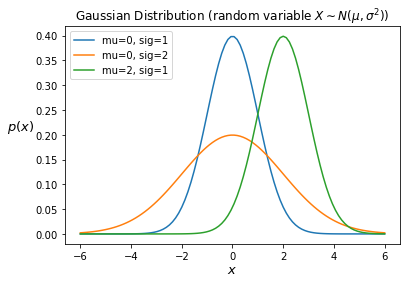

In [20]:
# mean and standard deviation 
mus = np.array([0, 0, 2])
sigmas = np.array([1, 2, 1])

### compute and plot pdf

# x values where we compute pdf
x = np.linspace(-6,6,100)

for mu, sigma in zip(mus, sigmas):
    
    # compute pdf values
    y = np.exp(-(x-mu)**2/(2*(sigma**2)))/np.sqrt(2*np.pi*(sigma**2))
    
    # plot with label
    plt.plot(x, y, label=f'mu={mu}, sig={sigma}') 

plt.legend() # show lable
plt.title('Gaussian Distribution (random variable $X\sim N(\mu,\sigma^2)$)')
plt.xlabel(r"$x$", labelpad=2, fontsize=13)
plt.ylabel(r"$p(x)$", rotation=0, labelpad=15, fontsize=13)
plt.show() # show plot 

In [21]:
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi) ** (D / 2)
    c2 = 1 / (LA.det(sigma) ** .5)
    inv_sigma = LA.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 += c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p


def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p += pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p

In [22]:
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
# X_range0 = [-3, 3]
# X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']

# 혼합 가우스 등고선 표시 -----------------------------------
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn * 1), np.reshape(xx1, xn * xn * 1)]
    f = mixgauss(x, pi, mu, sigma).reshape(xn, xn).T
    plt.contour(x0, x1, f, 10)
# 혼합 가우스 3D 표시 ---------------------------------------
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn * 1), np.reshape(xx1, xn * xn * 1)]
    f = mixgauss(x, pi, mu, sigma).reshape(xn, xn).T
    ax.plot_surface(xx0, xx1, f,
                  rstride=2, cstride=2, alpha=.3,
                  color='blue', edgecolor='black')

In [23]:
def plot_mixture_gaussian(pi, mu, sigma):
    Fig = plt.figure(1, figsize=(14, 6))
    Fig.add_subplot(1, 2, 1)
    show_contour_mixgauss(pi, mu, sigma)
    plt.grid(True)
    
    Ax = Fig.add_subplot(1, 2, 2, projection='3d')
    show3d_mixgauss(Ax, pi, mu, sigma)
    Ax.set_zticks([.05, .10])
    Ax.set_xlabel('$x_0$', fontsize=14)
    Ax.set_ylabel('$x_1$', fontsize=14)
    Ax.view_init(40, -100)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.show()

$${\bf X}\sim N(\mu_{\bf X},)$$

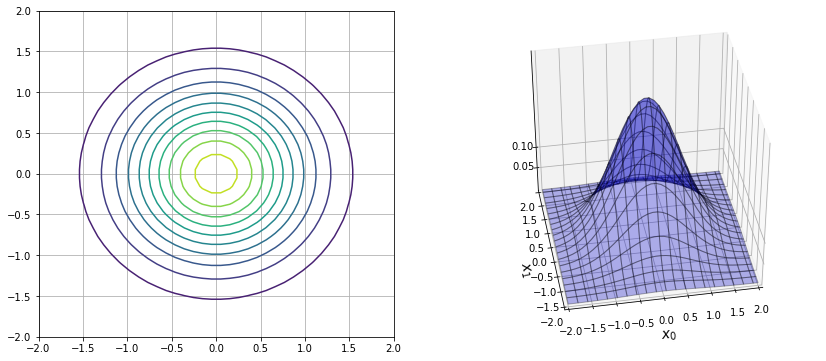

In [24]:
X_range0 = [-2, 2]
X_range1 = [-2, 2]
pi = np.array([1.])
mu = np.array([[0., 0.]])
sigma = np.array([[[.5, 0],[0, .5]]])

plot_mixture_gaussian(pi, mu, sigma)

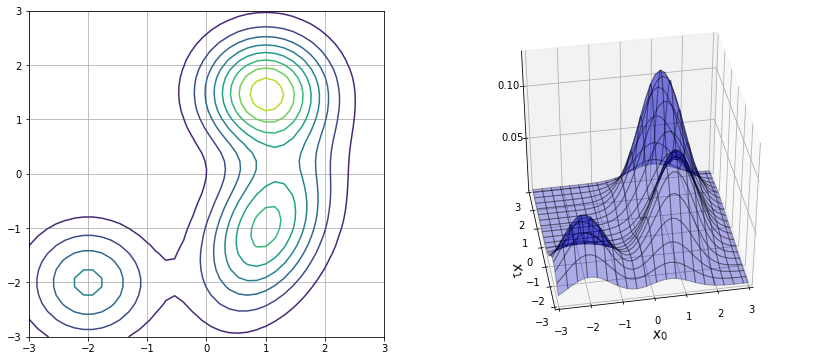

In [25]:
X_range0 = [-3, 3]
X_range1 = [-3, 3]

pi = np.array([.2, .4, .4])
mu = np.array(
    [[-2, -2],
     [-1, 1],
     [1.5, 1]]
)
sigma = np.array(
    [
        [[.5, 0],
         [0, .5]],
        [[1, .25],
         [.25, .5]],
        [[.5, 0],
         [0, .5]]
    ]
)

plot_mixture_gaussian(pi, mu, sigma)

## Properties of Normal Distribution

For $a\neq 0$
$$\begin{array}{lll}
(1)& X\sim\mbox{Normal}\quad\Rightarrow\quad aX+b\sim\mbox{Normal}\\
\end{array}$$
In particular,
$$\begin{array}{lll}
\mbox{Standardization}&&X\sim N(\mu,\sigma^2)\quad\Rightarrow\quad \frac{X-\mu}{\sigma}\sim N(0,1^2)\\
\mbox{Reverse Standardization}&&Z\sim N(0,1^2)\quad\Rightarrow\quad Z*\sigma+\mu\sim N(\mu,\sigma^2)\\
\end{array}$$

$$\begin{array}{lll}
(2)& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\Rightarrow\quad X+Y\sim\mbox{Normal}\quad\mbox{if $X$ and $Y$ are independent}\\
(3)& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\Rightarrow\quad X+Y\sim\mbox{Normal}\quad\mbox{if $(X,Y)$ is multivariate normal}\\
\mbox{WARNING}& X\sim\mbox{Normal},\ Y\sim\mbox{Normal}\quad\not\Rightarrow\quad X+Y\sim\mbox{Normal}\\
\end{array}$$

If $X$ and $Y$ are not independent, $X+Y$ may not be normal.
For example,
let $X$ be a standard normal.
Independent to $X$ we flip a fair coin and define $C$ as
$$
C=\left\{\begin{array}{rl}
1&\mbox{if the coin lands on head}\\
-1&\mbox{if the coin lands on tail}
\end{array}\right.
$$
Then we let $Y:=X*C$.
One can easily show that $Y$ is also a standard normal random variable.
However,
$$
P(X+Y=0)=P(C=-1)=0.5
$$
Therefore, $X+Y$ cannot be a normal.

(1) We handle the case $a>0$.
One can handle the other case similarly.
Let $X\sim N(\mu,\sigma^2)$. Then
$$
P\left(aX+b\le x\right)
=P\left(X\le\frac{x-b}{a}\right)
=\int_{-\infty}^{\frac{x-b}{a}}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(s-\mu)^2}{2\sigma^2}}ds$$
Let $f$ be the PDF of $aX+b$. Then
$$
P\left(aX+b\le x\right)
= \int_{-\infty}^{x}f(s)ds\\
$$
So we have
$$
\int_{-\infty}^{x}f(s)ds=\int_{-\infty}^{\frac{x-b}{a}}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(s-\mu)^2}{2\sigma^2}}ds
$$
Differentiating both sides
$$
f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(\frac{x-b}{a}-\mu\right)^2}{2\sigma^2}}\frac{1}{a}
\quad\sim\quad N(a\mu+b,a^2\sigma^2)
$$

## Bivariate Normal

### PDF
$$
f({\bf x})=\frac{1}{\sqrt{(2\pi)^2|\Sigma|}}e^{-\frac{1}{2}({\bf x}-\mu)'
\Sigma^{-1}
({\bf x}-\mu)}
$$
where
$$\begin{array}{llll}
\mbox{mean}&&\mu\nonumber\\
\\
\mbox{covariance matrix}&&\Sigma\nonumber\\
\\
\mbox{determinant of the covariance matrix $\Sigma$}&&|\Sigma|\nonumber\\
\end{array}$$

### Covariance matrix and its inverse
\begin{eqnarray}
\Sigma
=\left(\begin{array}{cc}\sigma _x^2&\rho\sigma _x\sigma _y\\\rho\sigma _x\sigma _y&\sigma _y^2\end{array}\right)
&\Rightarrow&
|\Sigma|
=(1-\rho^2)\sigma _x^2\sigma _y^2\nonumber\\
&\Rightarrow&
\Sigma^{-1}=\frac{1}{(1-\rho^2)\sigma _x^2\sigma _y^2}\left(\begin{array}{cc}\sigma _y^2&-\rho\sigma _x\sigma _y\\-\rho\sigma _x\sigma _y&\sigma _x^2\end{array}\right)\nonumber
\end{eqnarray}

### Another form of PDF
With ${\tilde x}=\frac{x-\mu_x}{\sigma _x}$, ${\tilde y}=\frac{y-\mu_y}{\sigma _y}$
\begin{eqnarray}
({\bf x}-\mu)'
\Sigma^{-1}
({\bf x}-\mu)
&=&
\frac{{\tilde x}^2+{\tilde y}^2-2\rho{\tilde x}{\tilde y}}{1-\rho^2}\nonumber
\end{eqnarray}

$$\begin{array}{llll}
\displaystyle
f({\bf x})
=
\frac{1}{2\pi\sigma _x\sigma _y}
e^{-\frac{{\tilde x}^2+{\tilde y}^2}{2}}&&\mbox{if $X$ and $Y$ are independent}\nonumber\\
\displaystyle
f({\bf x})
=
\frac{1}{2\pi\sigma _x\sigma _y\sqrt{1-\rho^2}}
e^{-\frac{{\tilde x}^2+{\tilde y}^2-2\rho{\tilde x}{\tilde y}}{2(1-\rho^2)}}&&\mbox{in general}\nonumber\\
\end{array}$$

## Multivariate Normal

### PDF
$$
f({\bf x})=\frac{1}{\sqrt{(2\pi)^d|\Sigma|}}e^{-\frac{1}{2}({\bf x}-\mu)'
\Sigma^{-1}
({\bf x}-\mu)}
$$
where
$$\begin{array}{llll}
\mbox{mean}&&\mu\nonumber\\
\\
\mbox{covariance matrix}&&\Sigma\nonumber\\
\\
\mbox{determinant of the covariance matrix $\Sigma$}&&|\Sigma|\nonumber\\
\end{array}$$

### Definition
Multivariate normal
${\bf x}=[x_1,x_2,\cdots,x_d]'$ is given by
$$
\underbrace{\left[\begin{array}{c}x_1\\x_2\\\vdots\\x_d\end{array}\right]}_{{\bf x}}
=
\underbrace{\left[\begin{array}{cccc}
a_{11}&a_{12}&\cdots&a_{1n}\\
a_{21}&a_{22}&\cdots&a_{2n}\\
\vdots&\vdots&\vdots&\vdots\\
a_{d1}&a_{d2}&\cdots&a_{dn}
\end{array}\right]}_{{\bf A}}
\underbrace{\left[\begin{array}{c}z_{1}\\z_{2}\\\vdots\\z_n\end{array}\right]}_{{\bf z}}
+
\underbrace{\left[\begin{array}{c}\mu_1\\\mu_2\\\vdots\\\mu_d\end{array}\right]}_{\mu},$$
$${\bf x}={\bf A}{\bf z}+\mu,$$
where $z_k$ are iid standard normal and
where ${\bf A}$ and $\mu$ are constants.

### Computation of mean and covariance matrix

$$\begin{array}{llll}
E{\bf x}
&=&E({\bf A}{\bf z}+\mu)
={\bf A}E{\bf z}+\mu
={\bf A}{\bf 0}+\mu
=\mu\nonumber
\end{array}$$

$$\begin{array}{llll}
\Sigma
&=&
E({\bf x}-\mu)({\bf x}-\mu)^T
=E({\bf A}{\bf z})({\bf A}{\bf z})^T
={\bf A}(E{\bf z}{\bf z}^T){\bf A}^T
={\bf A}{\bf I}{\bf A}^T
={\bf A}{\bf A}^T\nonumber
\end{array}$$

## Properties of Multivariate Normal

$$\begin{array}{lllll}
(1)&\mbox{$\mu$ and $\Sigma$ completely determine the multivariate normal distribution}\\
\\
(2)&\mbox{If off diagonals of $\Sigma$ are all 0, then all the components of ${\bf x}$ are independent}\\
\\
(3)&\mbox{If for fixed $i$, $\Sigma_{ij}=0$ for all $j\neq i$, then ${\bf x}_i$ is independent to ${\bf x}_j$, $j\neq i$}\\
\end{array}$$

# 1.5 Random Sequence

## 1.5.1 Definition

$$
{\bf X_t}:\Omega\longrightarrow \mathbb{R}^d
$$

$$
\{{\bf X_t}\}_{t\in T}
$$

- discrete: random sequence
- continuous: random process

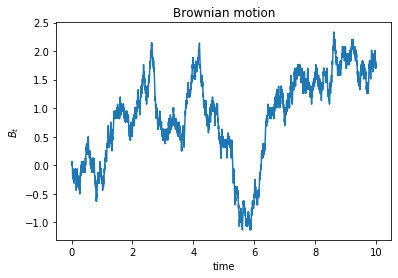

In [93]:
# set parameters ###############################################################
num_steps_per_year = 12*21
num_years = 10
# set parameters ###############################################################

np.random.seed(337)

def browian_motion(num_steps_per_year, num_years):
    # fair coins
    u = np.random.uniform(0, 1, (num_steps_per_year*num_years, ))
    c = np.ones_like(u)
    c[u < 0.5] = -1

    # Brownian motion
    b = np.cumsum(c) / np.sqrt(num_steps_per_year)
    # https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
    b = np.insert(b, 0, 0)
    return b

b = browian_motion(num_steps_per_year, num_years)
# time
t = np.linspace(0, num_years, num_steps_per_year*num_years + 1)   

# plot of Brownian motion 
plt.plot(t,b)
plt.title('Brownian motion')
plt.xlabel('time')
plt.ylabel('$B_t$')
plt.show()

In [94]:
b # 실험 결과 e를 고정, sample function

array([0.        , 0.06299408, 0.        , ..., 1.76383421, 1.70084013,
       1.76383421])

In [95]:
bs = np.array([browian_motion(num_steps_per_year, num_years) for _ in range(30)])

In [96]:
bs

array([[ 0.        ,  0.06299408,  0.12598816, ...,  2.77173947,
         2.70874539,  2.77173947],
       [ 0.        ,  0.06299408,  0.        , ..., -3.90563289,
        -3.96862697, -3.90563289],
       [ 0.        , -0.06299408, -0.12598816, ..., -2.01581052,
        -1.95281644, -1.88982237],
       ...,
       [ 0.        ,  0.06299408,  0.        , ...,  3.2756921 ,
         3.33868618,  3.40168026],
       [ 0.        ,  0.06299408,  0.12598816, ..., -1.00790526,
        -1.07089934, -1.13389342],
       [ 0.        ,  0.06299408,  0.        , ...,  2.01581052,
         2.0788046 ,  2.01581052]])

In [97]:
bs[:, 98] # 시간 고정, random vector

array([ 0.62994079,  1.51185789, -0.25197632,  0.        ,  0.25197632,
        0.50395263,  0.62994079,  0.37796447,  1.00790526, -0.50395263,
        0.62994079,  0.8819171 ,  0.37796447, -0.37796447, -0.37796447,
        0.25197632, -0.37796447,  0.50395263, -1.38586973, -0.37796447,
       -0.25197632, -1.51185789, -0.50395263,  0.8819171 ,  0.        ,
       -0.25197632,  0.8819171 , -0.12598816, -0.25197632,  0.25197632])

## 1.5.2 평균함수와 자기 상관함수
- 시간의 함수이기 때문에 독립적이지 않음

In [115]:
bs = np.array([browian_motion(num_steps_per_year, num_years) for _ in range(3000)])

In [123]:
b_k98 = bs[:, 98]
b_k785 = bs[:, 785]
b_k2000 = bs[:, 2000]

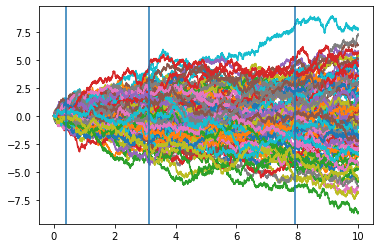

In [124]:
for i in np.random.randint(0, bs.shape[0], size=(100,)):
    plt.plot(t, bs[i, :])
plt.axvline(t[98])
plt.axvline(t[785])
plt.axvline(t[2000])
plt.show()

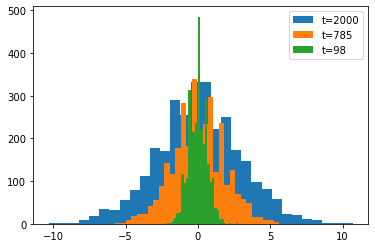

In [125]:
plt.hist(b_k2000, bins=30, label='t=2000')
plt.hist(b_k785, bins=30, label='t=785')
plt.hist(b_k98, bins=30, label='t=98')
plt.legend()
plt.show()

#### White Noise

In [136]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

count    1000.000000
mean       -0.001558
std         0.994901
min        -3.394014
25%        -0.670320
50%         0.020242
75%         0.685723
max         3.807500
dtype: float64


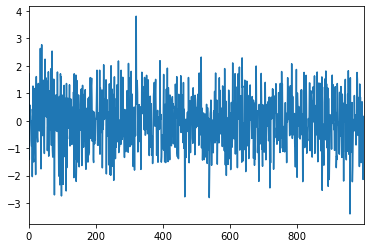

In [134]:
# y(t) = signal(t) + noise(t)

# create white noise series
series = [random.gauss(0.0, 1.0) for i in range(1000)]
series = pd.Series(series)

# summary stats
print(series.describe())

# line plot
series.plot()
plt.show()

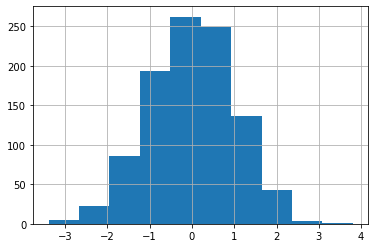

In [135]:
# histogram plot
series.hist()
plt.show()

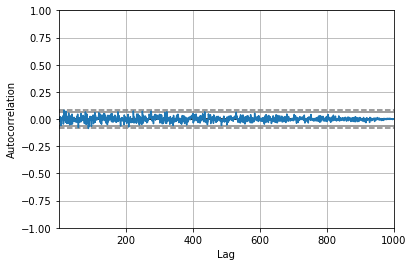

In [138]:
# autocorrelation
autocorrelation_plot(series)
plt.show()

## 1.5.3 Markov Sequence

$$p_{X_t}(x_{t+1}|x_t,x_{t-1},\cdots,x_0)=p_{X_t}(x_{t+1}|x_t)$$

# 1.6. Linear Stochastic Difference Equation
- 다양한 sequence를 생성하는데 사용할 수 있다.

In [50]:
s0 = 100
mu = 0.1
sigma = 0.3
T = 1
n = 12*21
dt = 1/n
n_sample_paths = 10000

In [51]:
pm_one = 2 * np.random.binomial(1,0.5,size=(int(n*T),n_sample_paths)) - 1
db = pm_one * np.sqrt(dt)

# Linear SDE
lhs = mu * dt + sigma * db

time = np.arange(int(n*T)+1) * dt
stock = np.empty((int(n*T)+1,n_sample_paths))
stock[0] = s0
for t in range(int(n*T)):
    stock[t+1] = stock[t] + stock[t] * lhs[t]

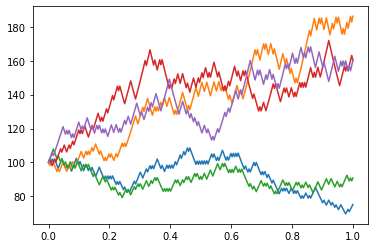

In [52]:
for i in range(5):
    plt.plot(time, stock[:,i])
plt.show()

# 1.8 Importance Sampling

##### MC
- 함수의 기댓값을 계산을 하는데,
- $p$의 분포를 가지는 $X$를 독립적으로 생성하여 함숫값을 계산, 평균으로 계산
\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&\approx&\frac{1}{n}\sum_{i=1}^n f(X_i)&&&&\mbox{$X_i\sim p$ iid}
\end{eqnarray}

##### Importance Sampling
- 다른 분포에서 sampling을 해서 weighted average를 취하여 계산

\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&=&\int f(x)p(x)dx\\
&=&\int \frac{p(x)}{q(x)}f(x)q(x)dx\\
&=&\mathbb{E}_{X\sim q} \frac{p(X)}{q(X)}f(X)\\
&:=&\mathbb{E}_{X\sim q} \omega(X) f(X)&&&&\omega(X)=\frac{p(X)}{q(X)}\\
&\approx&\frac{1}{n}\sum_{i=1}^n\omega(X_i)f(X_i)&&&&\mbox{$X_i\sim q$ iid}
\end{eqnarray}

$$\omega(X_i):=\cfrac{p(X)}{q(X)}\text{: likelihood ratio}$$
$$p\text{: nominal distribution}$$
$$q\text{: importance distribution}$$

#### Example

\begin{array}{llllllllllll}
\mbox{MC}&&&&\mathbb{E}_{X\sim N(0,1)}f(X)
&\approx&\frac{1}{n}\sum_{i=1}^nf(X_i)&&&&\mbox{$X_i\sim N(0,1)$ iid}\\
\mbox{IS}&&&&\mathbb{E}_{X\sim N(0,1)}f(X)&\approx&\frac{1}{n}\sum_{i=1}^n\omega(X_i)f(X_i)&&&&\mbox{$X_i\sim N(-3,1)$ iid}
\end{array}
where
$$
f(x)=(-x-3)^+=\left\{\begin{array}{ll}
-x-3&\mbox{if $-x-3\ge 0$}\\
0&\mbox{otherwise}
\end{array}
\right.
$$

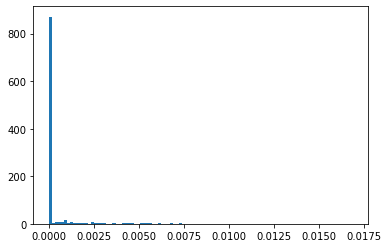

In [27]:
# MC

def f(x):
    return np.maximum(-x-3, 0)

n = 100
n_sim = 1000
x = np.random.normal(0., 1., (n_sim, n))
nfx = np.mean(f(x), axis=1)

plt.hist(nfx, bins=100)
plt.show()

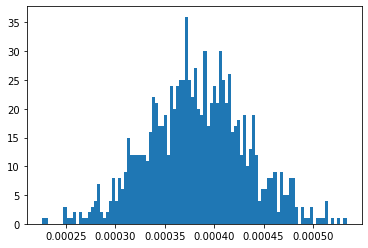

In [28]:
def f(x):
    return np.maximum(-x-3, 0)

def omega(x):
    return np.exp(- x**2/2 + (x+3)**2/2)

n = 100
n_sim = 1000
x = np.random.normal(-3., 1., (n_sim, n))
nfx = np.mean(omega(x)*f(x), axis=1)

plt.hist(nfx, bins=100)
plt.show()

위 둘 다 기댓값에 대한 unbiased지만 아래가 variance가 훨씬 작음!! (위 경우엔)

하지만, 경우에 따라 Importance Sampling의 분산값이 훨씬 커질 수 있다고 책에서 강조함!!

$$
Var_{p({\bf x})}[f({\bf x})]=E_{{\bf x}\sim p({\bf x})}[(f(x))^2]-(E_{{\bf x}\sim p({\bf x})}[f(x)])^2
$$

$$
Var_{p({\bf x})}\bigg[\cfrac{p({\bf x})}{q(\bf x)}f({\bf x})\bigg]=E_{{\bf x}\sim p({\bf x})}\bigg[\cfrac{p({\bf x})}{q(\bf x)}(f({\bf x}))^2\bigg]-(E_{{\bf x}\sim p({\bf x})}[f(x)])^2
$$

아래 내용은 정규화 상수를 모를 경우, Importance Sampling의 장단점에 대한 내용들. 자세한 내용은 연대 수학과 이성철 교수님 유튜브 강의를 들어주시길 바랍니다.

##### Importance Sampling without Normalization
Normalization Constant를 모르는 경우엔 어떻게 하는가?

- We can generate $n$ iid samples $X_i$ not from original PDF $p(x)$,
but from a new PDF $q(x)$.

- We know $\tilde{p}$, not $p=\tilde{p}/Z_p$. We don't know normalization constant $Z_f$. 

- We know $\tilde{q}$, not $q=\tilde{q}/Z_q$. We don't know normalization constant $Z_q$. 


With
$
\tilde{\omega}(X)=\frac{\tilde{p}(X)}{\tilde{q}(X)}
$
\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&\approx&\frac{1}{n}\sum_{i=1}^n\frac{\tilde{\omega}(X_i)}{\sum_{k=1}^n \tilde{\omega}(X_k)}f(X_i)&&&&\mbox{$X_i\sim q$ iid}
\end{eqnarray}

Estimate $\mathbb{E}_{X\sim p}f(X)$ by
\begin{eqnarray}
\mathbb{E}_{X\sim p}f(X)
&=&\int f(x)p(x)dx\\
&=&\int \frac{p(x)}{q(x)}f(x)q(x)dx\\
&=&\frac{Z_q}{Z_p}\int \frac{\tilde{p}(x)}{\tilde{q}(x)}f(x)q(x)dx \\
&=&\frac{Z_q}{Z_p}\mathbb{E}_{X\sim q} \frac{\tilde{p}(X)}{\tilde{q}(X)}f(X) \\
&:=&\frac{Z_q}{Z_p}\mathbb{E}_{X\sim q} \tilde{\omega}(X)f(X)&&&&\tilde{\omega}(X)=\frac{\tilde{p}(X)}{\tilde{q}(X)} \\
&\approx&\frac{Z_q}{Z_p}\left(\frac{1}{n}\sum_{i=1}^n\tilde{\omega}(X_i)f(X_i)\right)&&&&\mbox{$X_i\sim q$ iid}\\
&=&\frac{1}{n}\sum_{i=1}^n\frac{\tilde{\omega}(X_i)}{\frac{Z_p}{Z_q}}f(X_i)
\end{eqnarray}

Estimate $Z_p/Z_q$ by
\begin{eqnarray}
\frac{Z_p}{Z_q}
&=&\frac{1}{Z_q}\int \tilde{p}(x)dx\\
&=&\int \tilde{p}(x)\frac{1}{Z_q}dx\\
&=&\int \tilde{p}(x)\frac{q(x)}{\tilde{q}(x)}dx\\
&=&\int \frac{\tilde{p}(x)}{\tilde{q}(x)}q(x)dx\\
&=&\int {\tilde\omega}(x)q(x)dx\\
&=&\mathbb{E}_{X\sim q}{\tilde\omega}(X)\\
&\approx&\frac{1}{n}\sum_{i=1}^n\tilde{\omega}(X_i)&&&&\mbox{$X_i\sim q$ iid}
\end{eqnarray}

### Pros and cons of importance sampling

##### Pros

- Easier to sample from $q$

- Can reduce the variance of the estimator

- Works well in low dimension up to 6

##### Cons

- Does not work well in high dimension ($\Rightarrow$ MCMC)

- Need modification in sequential setting ($\Rightarrow$ sequential importance sampling)

### How to choose $q$
$$
\mbox{argmin}_q\  \int\frac{p^2f^2}{q^2}q-\left(\int\frac{pf}{q}q\right)^2
=\mbox{argmin}_q\  \int\frac{p^2f^2}{q^2}q-\left(\int pf\right)^2
=\mbox{argmin}_q\  \int\frac{p^2f^2}{q^2}q
$$

$$
\mbox{argmin}_{q_i>0,\ \sum_i q_i=1}\ \ \sum_i\frac{p_i^2f_i^2}{q_i^2}q_i
$$
$$
{\cal L}=\sum_i\frac{p_i^2f_i^2}{q_i^2}q_i-\beta\left(\sum_i q_i-1\right)
=\sum_i\frac{p_i^2f_i^2}{q_i}-\beta\left(\sum_i q_i-1\right)
$$
$$
\frac{\partial{\cal L}}{\partial q_i}=-\frac{p_i^2f_i^2}{q_i^2}-\beta=0
\ \ \Rightarrow\ \ q_i^2\propto p_i^2f_i^2
\ \ \Rightarrow\ \ q_i\propto p_if_i
\ \ \Rightarrow\ \ q_i=\frac{p_if_i}{\sum_k p_kf_k}
$$

$$\begin{array}{llllll}
\mbox{1st choice}&&q\propto pf\ \ \Rightarrow\ \  q=\frac{pf}{Z}\nonumber\\
\nonumber\\
\mbox{2nd choice}&&\mbox{Choose $q$ large when $pf$ is large}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Minimize the variance of the posterior}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Minimize the variance of the MCMC}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Use MLE or MAP}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Study the nature of the problem}\nonumber\\
\nonumber\\
\mbox{Other choice}&&\mbox{Cross validation}\nonumber\\
\end{array}$$

# 1.9 Entropy ~ 1.10 KL Divergence

## Entropy & Cross Entropy

새넌 엔트로피는 정보를 표현하는데 있어서 필요한 최소의 비트 수

정보마다 등장할 확률이 다를 것, 기댓값으로 계산

$$\mathbb{E}[x_i]=\sum p_i(x)x_i$$

근데 기댓값 대신에 $x_i$에 $-log_2(p_i)$를 넣으면 이론상 필요한 최소한의 비트의 수가 된다를 밝힘

$$Entropy=\sum p_i(-log_2(p_i))$$

크로스 엔트로피는 우리가 어떤 정보를 인코딩, 실제로 이론상만큼은 못할 것임.
$$CE=\sum p_i (-log_2(q_i))$$

## What is KL-Divergence?

$$D_{KL}=CrossEntropy-Entropy$$

$$
KL(p||q)=\sum_i p_i\log\frac{p_i}{q_i}
$$

#### Distance

$$\begin{array}{lll}
(1)&&d(x,y)\ge 0\quad\mbox{for all $x$ and $y$}\\
(2)&&d(x,y)=0\quad\mbox{if and only if}\quad x=y\\
(3)&&d(x,y)=d(y,x)\quad\mbox{for all $x$ and $y$}\\
(4)&&d(x,y)+d(y,z)\ge d(x,z)\quad\mbox{for all $x$, $y$, and $z$}\\
\end{array}$$

$$\begin{array}{lll}
KL(f||g)&=&\int f(x)\log \frac{f(x)}{g(x)}dx\\
&=&-\int f(x)\log \frac{g(x)}{f(x)}dx\\
&\ge& -\log \int f(x)\frac{g(x)}{f(x)}dx\\
&=&-\log \int g(x)dx\\
&=&-\log 1=0
\end{array}$$

$$
KL(f||f)=\int f(x)\log \frac{f(x)}{f(x)}dx=\int f(x)\log 1dx=0
$$


In [30]:
p = np.random.uniform(0.,1.,3)
q = np.random.uniform(0.,1.,3) 
r = np.random.uniform(0.,1.,3) 

p = p / np.sum(p)
q = q / np.sum(q)
r = r / np.sum(r)
print(p)
print(q)
print(r)

[0.33558678 0.03968274 0.62473048]
[0.1128461  0.44288461 0.44426929]
[0.31076567 0.59767969 0.09155464]


### KL Divergence is not symetric.

In [31]:
d_pq = np.sum(p*np.log(p/q))
d_qp = np.sum(q*np.log(q/p))
print(d_pq-d_qp)

-0.3110042250560906


### KL Divergence does not satisfy triangular inequality.

In [32]:
d_pq = np.sum(p*np.log(p/q))
d_qr = np.sum(q*np.log(q/r))
d_pr = np.sum(p*np.log(p/r))
print(d_pq+d_qr-d_pr)

-0.18025610032123973


### Relation to Fisher information metric


$$\begin{array}{lll}
KL(f_{\theta_0}||f_{\theta})
&=&\int f_{\theta_0}\log \frac{f_{\theta_0}}{f_{\theta}}\\
&\approx& KL(f_{\theta_0}||f_{\theta_0})+ (\theta-\theta_0)^T{\bf g}(\theta-\theta_0)+\frac{1}{2}(\theta-\theta_0)^T{\bf H}(\theta-\theta_0)
\end{array}$$
$$$$
$$
KL(f_{\theta_0}||f_{\theta_0})=0
$$
$$$$
$$\begin{array}{llllll}
{\bf g}=0\\
\\
\left[\frac{\partial}{\partial\theta_i}KL(f_{\theta_0}||f_{\theta})\right]_{\theta=\theta_0}
&=&\left[
\int f_{\theta_0}\frac{-\frac{f_{\theta_0}}{f^2_\theta}\frac{\partial f_\theta}{\partial\theta_i}}{\frac{f_{\theta_0}}{f_\theta}}
\right]_{\theta=\theta_0}
&=&-\left[
\int f_{\theta_0}\frac{\partial \log f_\theta}{\partial\theta_i}
\right]_{\theta=\theta_0}\\\\
&=&-\left[
\int f_{\theta_0}\frac{\frac{\partial f_\theta}{\partial\theta_i}}{f_\theta}
\right]_{\theta=\theta_0}\\
&=&-\left[
\int \frac{\partial f_\theta}{\partial\theta_i}
\right]_{\theta=\theta_0}\\
&=&-\left[
\frac{\partial }{\partial\theta_i}\int f_\theta
\right]_{\theta=\theta_0}\\
&=&-\left[
\frac{\partial }{\partial\theta_i}1
\right]_{\theta=\theta_0}=0\\
\end{array}$$
$$$$
$$\begin{array}{lll}
\left[\frac{\partial^2}{\partial\theta_i\partial\theta_j}KL(f_{\theta_0}||f_{\theta})\right]_{\theta=\theta_0}
&=&-\left[
\frac{\partial}{\partial\theta_j}\int f_{\theta_0}\frac{\partial \log f_\theta}{\partial\theta_i}
\right]_{\theta=\theta_0}\\
&=&-\left[
\int f_{\theta_0}\frac{\partial}{\partial\theta_j}\frac{\partial \log f_\theta}{\partial\theta_i}
\right]_{\theta=\theta_0}\\
&=&-\left[
\int f_{\theta_0}\frac{\partial}{\partial\theta_j}\frac{\frac{\partial f_\theta}{\partial\theta_i}}{f_\theta}
\right]_{\theta=\theta_0}\\
&=&\left[
\int f_{\theta_0}\frac{1}{f^2_\theta}\frac{\partial f_\theta}{\partial\theta_i}\frac{\partial f_\theta}{\partial\theta_j}
-\int f_{\theta_0}\frac{\frac{\partial^2}{\partial\theta_i\partial\theta_j}f_\theta}{f_\theta}
\right]_{\theta=\theta_0}\\
&=&\left[
\int f_{\theta_0}\frac{1}{f^2_\theta}\frac{\partial f_\theta}{\partial\theta_i}\frac{\partial f_\theta}{\partial\theta_j}
-\int \frac{\partial^2}{\partial\theta_i\partial\theta_j}f_\theta
\right]_{\theta=\theta_0}\\
&=&\left[
\int f_{\theta_0}\frac{1}{f^2_\theta}\frac{\partial f_\theta}{\partial\theta_i}\frac{\partial f_\theta}{\partial\theta_j}
-\frac{\partial^2}{\partial\theta_i\partial\theta_j}\int f_\theta
\right]_{\theta=\theta_0}\\
&=&\left[
\int f_{\theta_0}\frac{1}{f^2_\theta}\frac{\partial f_\theta}{\partial\theta_i}\frac{\partial f_\theta}{\partial\theta_j}
-\frac{\partial^2}{\partial\theta_i\partial\theta_j}1
\right]_{\theta=\theta_0}\\
&=&\left[
\int f_{\theta_0}\frac{1}{f^2_\theta}\frac{\partial f_\theta}{\partial\theta_i}\frac{\partial f_\theta}{\partial\theta_j}
\right]_{\theta=\theta_0}\\
&=&\left[
\int f_{\theta_0}\frac{\partial \log f_\theta}{\partial\theta_i}\frac{\partial \log f_\theta}{\partial\theta_j}
\right]_{\theta=\theta_0}\\
\end{array}$$
$$$$
$$
{\bf H}=E_{x\sim f_{\theta_0}}(\nabla \log f_\theta)_{\theta=\theta_0}(\nabla \log f_\theta)^T_{\theta=\theta_0}\ge 0\quad\mbox{Fisher information metric}
$$
$$$$
$$\begin{array}{lll}
(\theta-\theta_0)^T{\bf H}(\theta-\theta_0)
&=&(\theta-\theta_0)^T\left[E_{x\sim f_{\theta_0}}(\nabla \log f_\theta)_{\theta=\theta_0}(\nabla \log f_\theta)^T_{\theta=\theta_0}\right](\theta-\theta_0)\\
&=&E_{x\sim f_{\theta_0}}(\theta-\theta_0)^T(\nabla \log f_\theta)_{\theta=\theta_0}(\nabla \log f_\theta)^T_{\theta=\theta_0}(\theta-\theta_0)\\
&=&E_{x\sim f_{\theta_0}}\left[(\nabla \log f_\theta)^T_{\theta=\theta_0}(\theta-\theta_0)\right]^2\ge 0\\
\end{array}$$

### 더 공부하고자 한다면?

#### Undergraduate Probability Reference

Bertsekas, Introduction to Probability

Ross, Introduction to probability models

이승철, 타짜의 수학

#### Graduate Probability Reference

Durrett, Probability theory and example

Sun
[pdf](http://www.math.nus.edu.sg/~matsr/teaching.html)

Varadan
[pdf](https://math.nyu.edu/~varadhan/)

## Reference
- http://m.kisdi.re.kr/mobile/colm/pro_view.m?seq=29947&category=W&selectPage=1
- http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/
- https://www.lesswrong.com/posts/RTt59BtFLqQbsSiqd/a-history-of-bayes-theorem
- https://angeloyeo.github.io/2020/01/09/Bayes_rule.html
- http://www.ifp.illinois.edu/~hajek/Papers/randomprocJuly14.pdf
- http://ocw.snu.ac.kr/sites/default/files/NOTE/1792.pdf
- https://en.wikipedia.org/wiki/Frequentist_probability
- https://stementor.tistory.com/entry/%ED%86%B5%EA%B3%84%EB%9E%91-2%EC%9D%BC%EC%A7%B8-%EA%B8%B0%EC%B4%88%ED%99%95%EB%A5%A0%EB%A1%A0-1
- https://github.com/SungchulLee/probability/blob/master/Probability.ipynb
- https://github.com/SungchulLee/probability/blob/master/Probability_presentation.ipynb
- http://www.dam.brown.edu/people/huiwang/classes/am165/Prob_ch5_2007.pdf
- https://statweb.stanford.edu/~owen/mc/Ch-var-is.pdf
- https://stats.stackexchange.com/questions/295617/what-is-the-advantages-of-wasserstein-metric-compared-to-kullback-leibler-diverg
- https://rosinality.github.io/2017/04/wasserstein-%EA%B1%B0%EB%A6%AC/
- https://github.com/SungchulLee/machine_learning
- https://stackoverflow.com/questions/33898665/python-generate-array-of-specific-autocorrelation
- https://dsp.stackexchange.com/questions/481/does-the-autocorrelation-function-completely-describe-a-stochastic-process
- http://feldman.faculty.pstat.ucsb.edu/174-03/lectures/l2-3.pdf
- https://machinelearningmastery.com/white-noise-time-series-python/